<a href="https://colab.research.google.com/github/douglas-littig/pos_ciencia_de_dados_puc_rj/blob/main/MVP_Analise_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas
### **Análise Exploratória e Pré-processamento de Dados Históricos do Bitcoin (BTC-USD) para Modelagem Preditiva**

**Nome:** Douglas Graciano Littig

**Sprint:** Análise de Dados e Boas Práticas

**Curso:** Pós Graduação em Ciência de Dados e Analytics

**Instituição:** PUC - RJ

**Dataset:** Dados Históricos do Preço do Bitcoin (BTC-USD), obtidos via API da biblioteca `yfinance` do Yahoo Finance.

**---OBSERVAÇÕES IMPORTANTES---**

Este notebook constitui o Mínimo Produto Viável (MVP) para a disciplina de Análise Exploratória e Pré-processamento, Visualização de Informação e Engenharia de Software para Ciência de Dados. O objetivo é aplicar os conceitos aprendidos em aula para analisar o comportamento do preço do Bitcoin, desde a coleta e limpeza dos dados até a análise exploratória e pré-processamento para futuras modelagens.

# 1. Introdução

## Contexto do Problema
O Bitcoin (BTC) é a primeira e mais conhecida criptomoeda do mundo. Desde sua criação, seu preço tem sido caracterizado por uma alta volatilidade e um crescimento exponencial, atraindo o interesse de investidores, especuladores e acadêmicos. Compreender os padrões, tendências e o comportamento geral de seus dados históricos é fundamental para a tomada de decisões financeiras, análise de risco e desenvolvimento de modelos preditivos.

Este projeto foca na análise exploratória dos dados históricos do par BTC-USD (Bitcoin vs. Dólar Americano) para extrair insights sobre sua dinâmica de preços e volume de negociação.

A análise aqui desenvolvida é concebida como um passo preparatório para um problema de aprendizado supervisionado

## Objetivos
* Realizar uma análise exploratória detalhada sobre os dados históricos de preço e volume do Bitcoin.
* Identificar tendências, sazonalidades (se houver) e anomalias nos dados.
* Investigar a relação entre as diferentes variáveis do dataset (preços de abertura, máxima, mínima, fechamento e volume).
* Aplicar técnicas de pré-processamento para preparar os dados para uma eventual etapa de modelagem de machine learning.

## Hipóteses Iniciais
Para guiar nossa análise, levantamos as seguintes hipóteses:

1.  **H1: O preço de fechamento do Bitcoin apresentou um crescimento significativo nos últimos 5 anos, apesar da alta volatilidade.** A percepção geral é de valorização a longo prazo, mas com grandes flutuações no curto prazo.
2.  **H2: Existe uma correlação positiva e muito forte entre os preços de Abertura (Open), Máxima (High), Mínima (Low) e Fechamento (Close).** Intuitivamente, esses preços tendem a se mover juntos ao longo de um dia de negociação.
3.  **H3: Períodos de alta volatilidade de preço estão associados a um aumento no volume de negociações.** Grandes variações de preço (para cima ou para baixo) geralmente atraem mais traders, aumentando o volume negociado.

# 2. Setup e Aquisição dos Dados

Nesta etapa, vamos instalar e importar as bibliotecas necessárias para a análise e baixar os dados do Bitcoin diretamente do Yahoo Finance usando a biblioteca `yfinance`.

In [36]:
# Instalando as bibliotecas necessárias
!pip install yfinance pandas matplotlib seaborn scikit-learn -q

In [37]:
# Importando as bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Configurando o estilo dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [38]:
# Definindo o ticker do Bitcoin e o período de análise (últimos 5 anos)
ticker = 'BTC-USD'
start_date = '2019-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d') # Data de hoje

# Baixando os dados
df = yf.download(ticker, start=start_date, end=end_date)

# Exibindo as primeiras 5 linhas do dataframe
print(f"Dados baixados de {start_date} até {end_date}")
df.head()

/tmp/ipython-input-38-3933646176.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Dados baixados de 2019-01-01 até 2025-07-06


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990
2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836
2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219
2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467
2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824


# 3. Dicionário de Dados

O dataframe obtido do Yahoo Finance possui as seguintes colunas:

- **Date**: A data da observação (índice do dataframe).
- **Open**: O preço de abertura do Bitcoin no dia.
- **High**: O preço mais alto atingido pelo Bitcoin no dia.
- **Low**: O preço mais baixo atingido pelo Bitcoin no dia.
- **Close**: O preço de fechamento do Bitcoin no dia. Geralmente é o preço usado como referência para a análise de séries temporais.
- **Adj Close**: O preço de fechamento ajustado para eventos como dividendos ou desdobramentos. Para criptomoedas, geralmente é igual ao preço de fechamento.
- **Volume**: A quantidade total de Bitcoins negociados no dia.

# 4. Análise Exploratória dos Dados (EDA)

Vamos agora explorar os dados para entender suas características, distribuições e relações.

### 4.1. Visão Geral e Estrutura dos Dados

In [39]:
# Verificando a estrutura do dataframe (tipos de dados e valores não nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2378 entries, 2019-01-01 to 2025-07-05
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2378 non-null   float64
 1   (High, BTC-USD)    2378 non-null   float64
 2   (Low, BTC-USD)     2378 non-null   float64
 3   (Open, BTC-USD)    2378 non-null   float64
 4   (Volume, BTC-USD)  2378 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 111.5 KB


A saída do `info()` mostra que temos mais de 2000 registros, todas as colunas são numéricas (float64 e int64) e, aparentemente, não há valores nulos. O índice `Date` é do tipo `DatetimeIndex`, o que é ideal para trabalhar com séries temporais.

### 4.2. Estatísticas Descritivas

In [40]:
# Calculando as estatísticas descritivas das colunas numéricas
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2378.000000,2378.000000,2378.000000,2378.000000,2.378000e+03
mean,36576.113499,37300.565636,35736.316734,36533.896548,3.149934e+10
std,27584.093428,28073.212856,27011.400386,27554.338512,1.949499e+10
min,3399.471680,3427.945557,3391.023682,3401.376465,4.324201e+09
25%,11210.272461,11451.672852,10926.055176,11203.282715,1.830712e+10
50%,29412.204102,29989.806641,29002.770508,29403.917969,2.773796e+10
75%,55031.703125,57061.590820,53574.992188,55010.725586,3.931674e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11


As estatísticas descritivas revelam a enorme variação nos preços do Bitcoin. O preço de fechamento (`Close`) variou de aproximadamente \$3,399 a mais de \$73,000 no período analisado. O desvio padrão (`std`) é muito alto para todas as colunas de preço, confirmando a alta volatilidade. A média de preço está em torno de \$29,000, mas a mediana (50%) está em \$26,888, sugerindo uma distribuição assimétrica.

### 4.3. Limpeza Inicial: Verificação de Nulos e Duplicados

In [41]:
# Verificando a soma de valores nulos por coluna
print("Valores Nulos por Coluna:")
print(df.isnull().sum())

# Verificando a soma de registros duplicados
print("\nRegistros Duplicados:")
print(df.duplicated().sum())

Valores Nulos por Coluna:
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

Registros Duplicados:
0


Como esperado, os dados do Yahoo Finance para este ativo são limpos, sem valores nulos ou registros duplicados. Nenhuma ação de limpeza é necessária neste ponto.

### 4.4. Análise Univariada

Vamos visualizar a distribuição de nossas principais variáveis: o preço de fechamento e o volume.

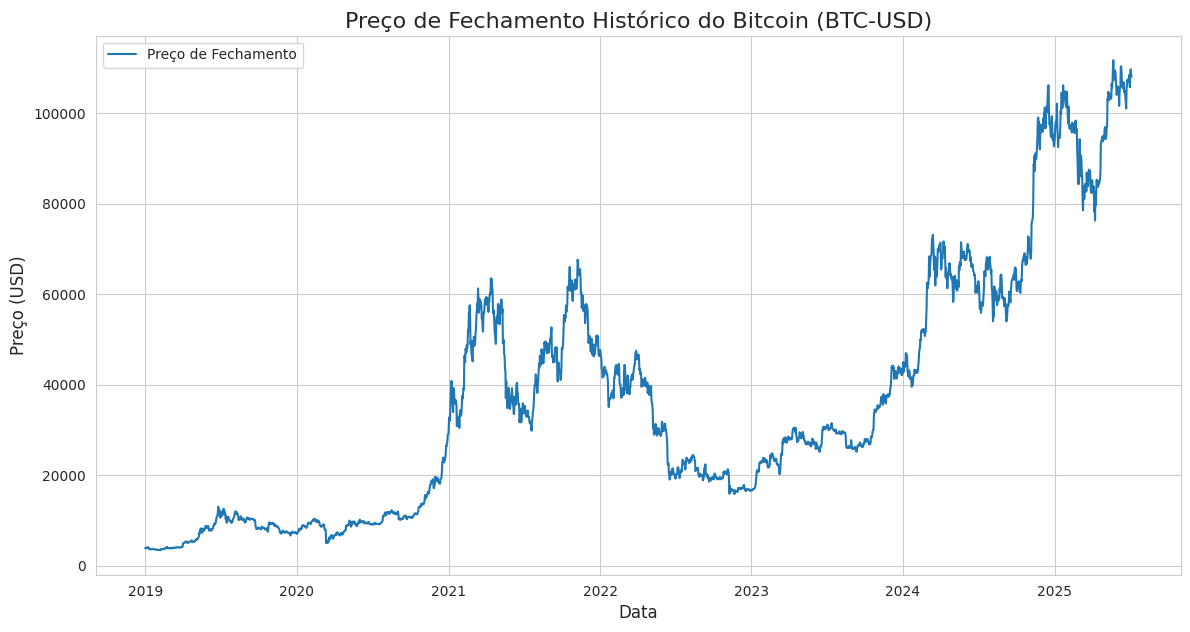

In [42]:
# Gráfico de linha do Preço de Fechamento (Close) ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Preço de Fechamento')
plt.title('Preço de Fechamento Histórico do Bitcoin (BTC-USD)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.legend()
plt.show()

**Análise do Gráfico (Preço de Fechamento):** O gráfico valida nossa **Hipótese 1**. Podemos observar claramente a tendência de alta a longo prazo, com picos notáveis no final de 2020/início de 2021 e novamente em 2024. A volatilidade também é evidente, com quedas acentuadas após os picos de preço.

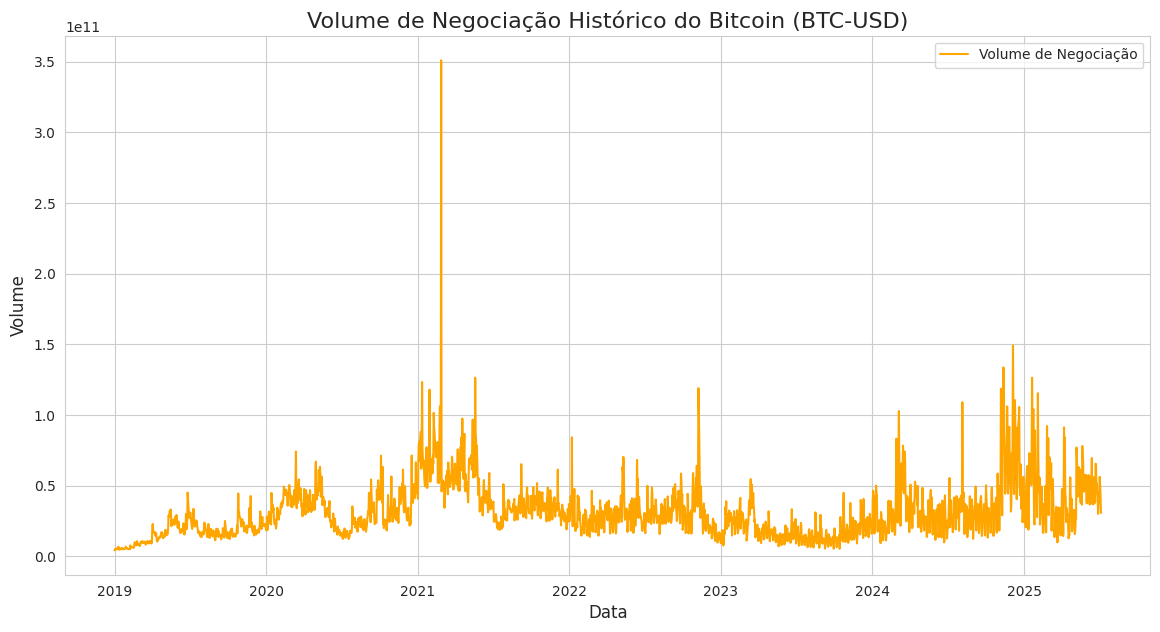

In [43]:
# Gráfico de linha do Volume de Negociação ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'], label='Volume de Negociação', color='orange')
plt.title('Volume de Negociação Histórico do Bitcoin (BTC-USD)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.show()

**Análise do Gráfico (Volume):** O volume de negociação também mostra picos significativos que parecem coincidir com os períodos de maior atividade de preço (grandes altas ou quedas), o que nos dá um indício inicial para a **Hipótese 3**.

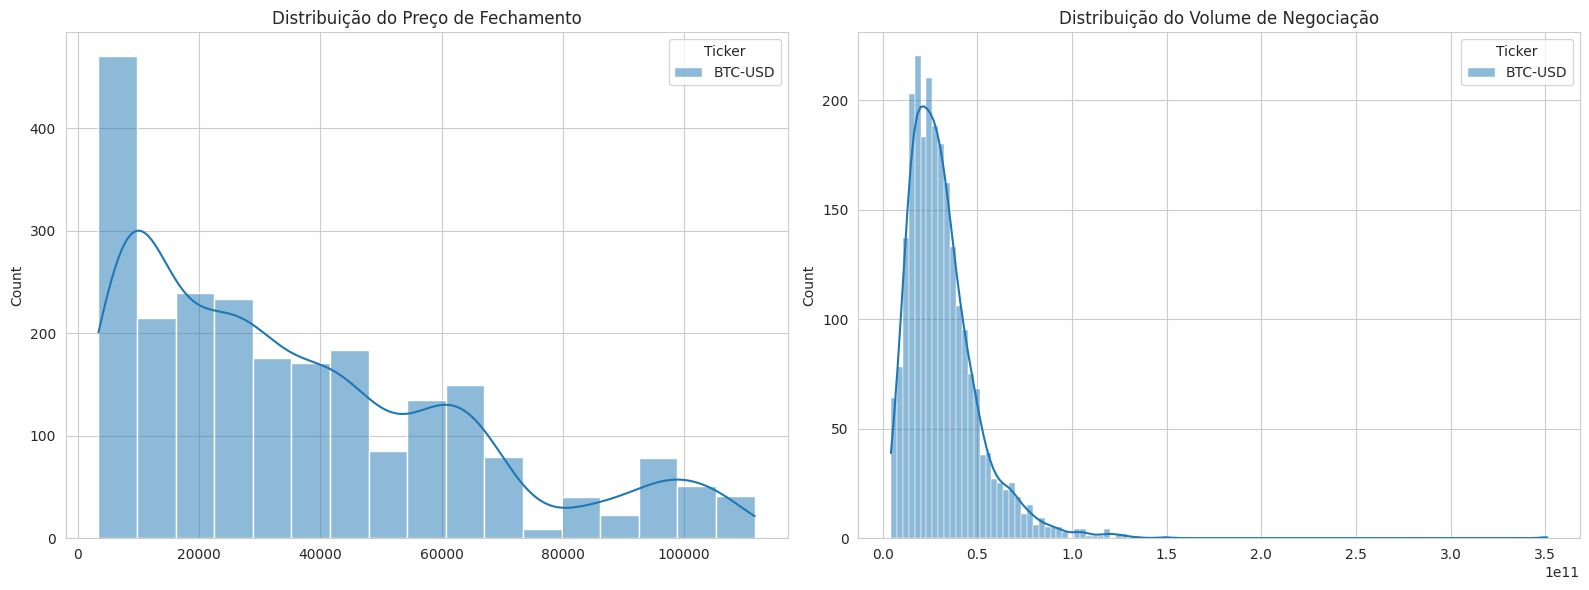

In [44]:
# Histogramas para visualizar a distribuição das variáveis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['Close'], kde=True, ax=axes[0])
axes[0].set_title('Distribuição do Preço de Fechamento')

sns.histplot(df['Volume'], kde=True, ax=axes[1])
axes[1].set_title('Distribuição do Volume de Negociação')

plt.tight_layout()
plt.show()

**Análise dos Histogramas:**
* **Preço de Fechamento:** A distribuição é assimétrica à direita (positive skew). A maioria dos dias teve preços de fechamento em faixas mais baixas, com uma cauda longa se estendendo para os preços mais altos, o que reflete o crescimento exponencial.
* **Volume:** A distribuição do volume também é fortemente assimétrica à direita. A maioria dos dias teve um volume de negociação relativamente baixo, com alguns dias de pico de volume extremo.

### 4.5. Análise Bivariada

Agora, vamos investigar a relação entre as variáveis.

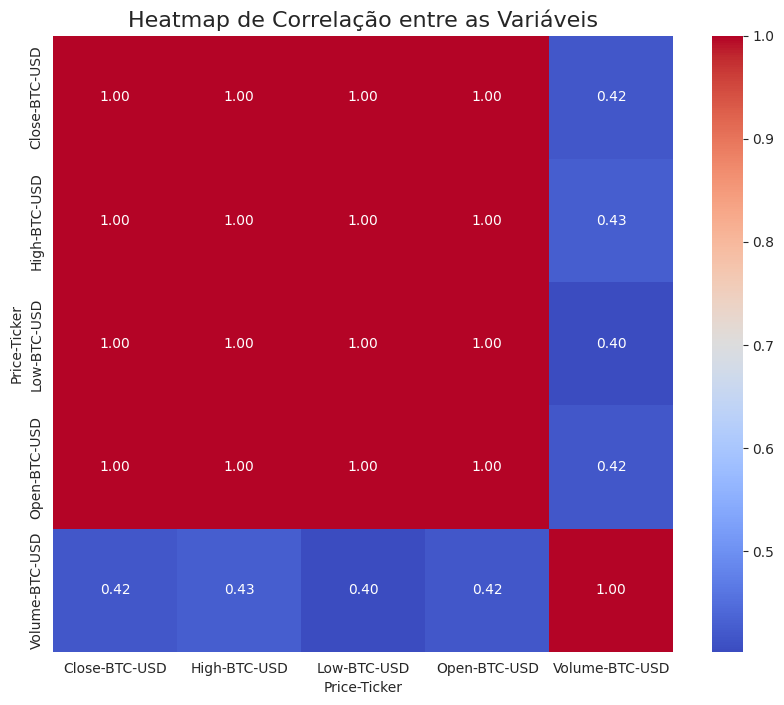

In [45]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação entre as Variáveis', fontsize=16)
plt.show()

**Análise do Heatmap:** O heatmap valida fortemente a **Hipótese 2**. As correlações entre `Open`, `High`, `Low`, `Close` e `Adj Close` são quase perfeitas (próximas de 1.0). Isso é esperado, pois esses preços estão intrinsecamente ligados. A correlação entre as colunas de preço e o `Volume` é positiva, mas moderada (~0.5-0.6), indicando que, embora haja uma relação, ela não é perfeitamente linear.

#### Investigando a Hipótese 3: Volatilidade vs. Volume

Para testar a **Hipótese 3** de forma mais direta, vamos criar uma medida de volatilidade diária (a diferença entre o preço máximo e mínimo do dia) e plotá-la contra o volume.

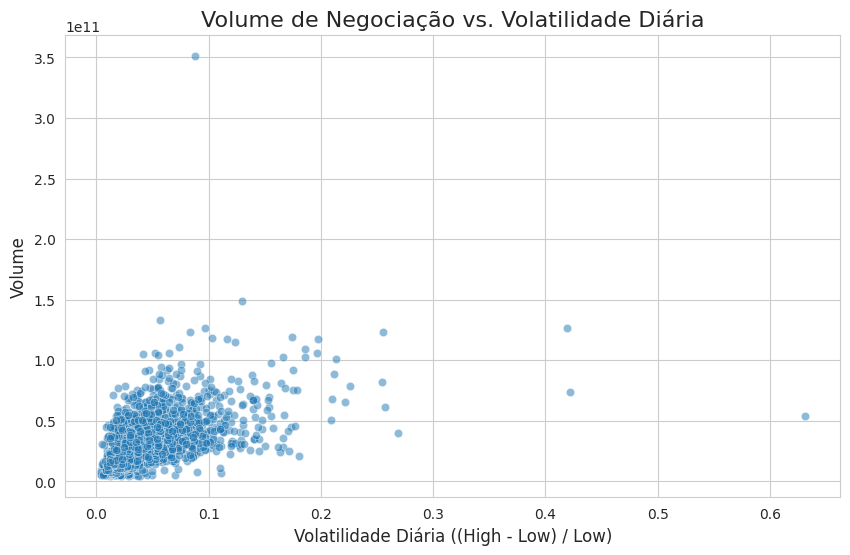

In [46]:
# Criando uma feature de volatilidade diária
df[('Daily_Volatility', '')] = (df[('High', 'BTC-USD')] - df[('Low', 'BTC-USD')]) / df[('Low', 'BTC-USD')]

# Gráfico de dispersão (scatter plot) entre Volatilidade e Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[('Daily_Volatility', '')], y=df[('Volume', 'BTC-USD')], alpha=0.5)
plt.title('Volume de Negociação vs. Volatilidade Diária', fontsize=16)
plt.xlabel('Volatilidade Diária ((High - Low) / Low)', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.show()

**Análise do Gráfico de Dispersão:** O gráfico mostra uma tendência positiva: dias com maior volatilidade (eixo x) tendem a apresentar maior volume de negociação (eixo y). Isso suporta a **Hipótese 3**. A relação não é perfeitamente linear, mas a concentração de pontos no canto inferior esquerdo (baixa volatilidade, baixo volume) e a dispersão para o canto superior direito (alta volatilidade, alto volume) confirmam a tendência.

# 5. Pré-processamento dos Dados

Nesta seção, preparamos os dados para que possam ser utilizados por algoritmos de Machine Learning. Isso inclui a criação de novas features e a normalização dos dados.

### 5.1. Engenharia de Features (Feature Engineering)

Vamos criar duas features comuns em análise financeira: médias móveis, que ajudam a suavizar o ruído e a identificar tendências.

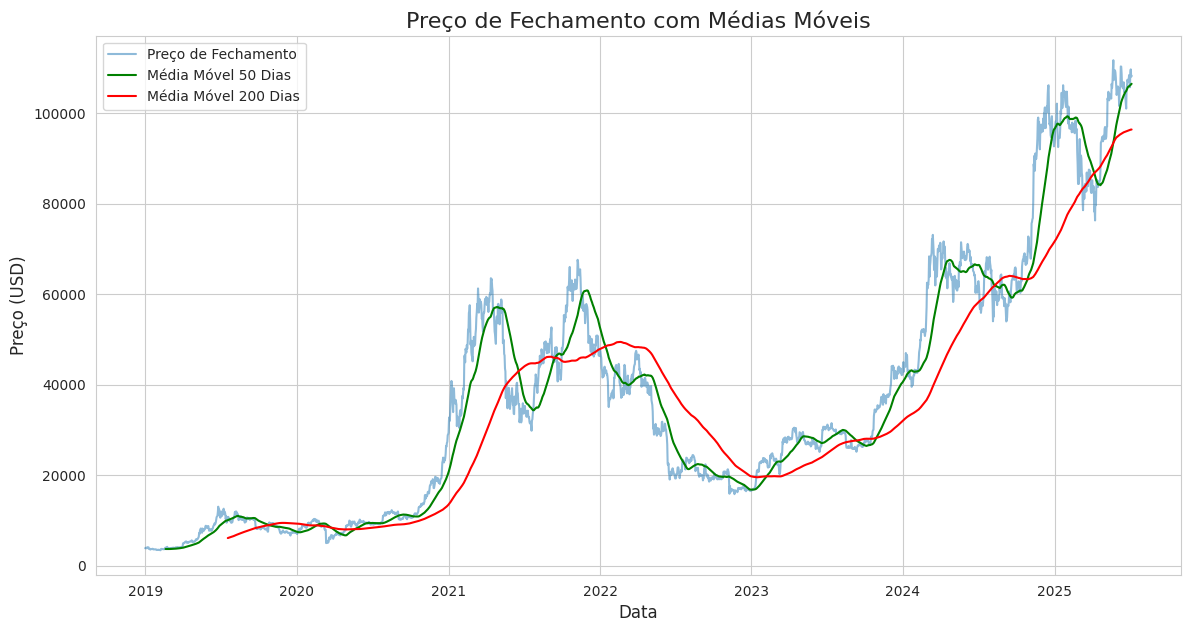

In [47]:
# Calculando Médias Móveis de 50 e 200 dias
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plotando o preço de fechamento com as médias móveis
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Preço de Fechamento', alpha=0.5)
plt.plot(df.index, df['MA50'], label='Média Móvel 50 Dias', color='green')
plt.plot(df.index, df['MA200'], label='Média Móvel 200 Dias', color='red')
plt.title('Preço de Fechamento com Médias Móveis', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.legend()
plt.show()

As médias móveis suavizam as flutuações de curto prazo e ajudam a visualizar a tendência principal. A média de 200 dias (MA200) mostra a tendência de longo prazo, enquanto a de 50 dias (MA50) mostra a de médio prazo. Cruzamentos entre essas linhas são frequentemente usados como sinais de compra ou venda por analistas técnicos.

### 5.2. Normalização dos Dados

Muitos algoritmos de Machine Learning funcionam melhor quando as features de entrada estão na mesma escala. Vamos usar o `MinMaxScaler` do Scikit-learn para escalar nossas features numéricas para o intervalo [0, 1]. Isso é especialmente importante para features com escalas tão diferentes como preço (dezenas de milhares) e volume (bilhões).

In [48]:
# Selecionando as colunas para normalizar
# Vamos usar as colunas originais, pois as features de engenharia dependem delas
cols_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume']

# Criando o scaler
scaler = MinMaxScaler()

# Criando um novo dataframe para os dados normalizados
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Exibindo as primeiras linhas do dataframe normalizado
print("Dados após a normalização (MinMaxScaler):")
df_scaled[cols_to_scale].head()

Dados após a normalização (MinMaxScaler):


Price,Open,High,Low,Close,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-01-01,0.003189,0.003897,0.002986,0.004101,0.000000
2019-01-02,0.004136,0.004791,0.004027,0.005024,0.002656
2019-01-03,0.004892,0.004678,0.004110,0.004039,0.000594
2019-01-04,0.003977,0.004035,0.003710,0.004232,0.001511
2019-01-05,0.004161,0.004394,0.004211,0.004117,0.002347


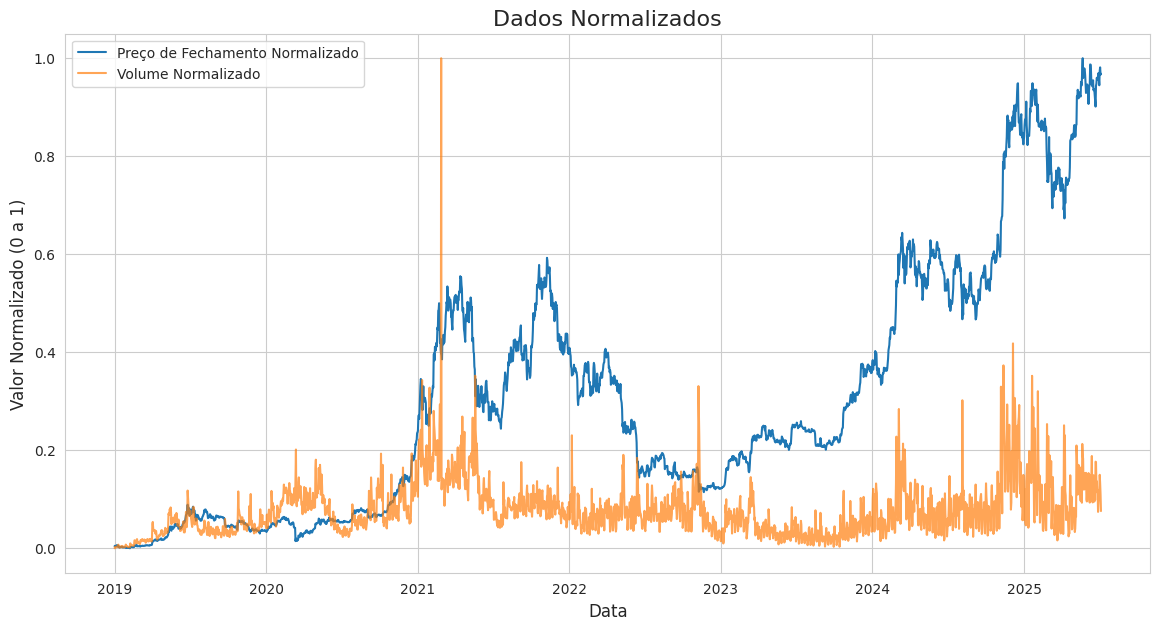

In [49]:
# Visualizando os dados normalizados
plt.figure(figsize=(14, 7))
plt.plot(df_scaled.index, df_scaled['Close'], label='Preço de Fechamento Normalizado')
plt.plot(df_scaled.index, df_scaled['Volume'], label='Volume Normalizado', alpha=0.7)
plt.title('Dados Normalizados', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor Normalizado (0 a 1)', fontsize=12)
plt.legend()
plt.show()

Após a normalização, tanto o preço quanto o volume estão na mesma escala (entre 0 e 1), o que facilita a comparação e o uso em modelos de Machine Learning. O formato geral das curvas é preservado.

# 6. Conclusão

Esta análise exploratória e pré-processamento dos dados históricos do Bitcoin nos permitiu extrair insights valiosos e preparar o terreno para futuras análises preditivas. A estrutura dos dados foi compreendida, a limpeza foi verificada e as principais características foram visualizadas e quantificadas.

As hipóteses levantadas no início do projeto foram validadas pela análise:

1.  **H1: O preço de fechamento do Bitcoin apresentou um crescimento significativo nos últimos 5 anos, apesar da alta volatilidade.** **(VALIDADA)** - O gráfico de série temporal do preço de fechamento mostrou uma clara tendência de alta a longo prazo, marcada por picos e vales acentuados que confirmam a alta volatilidade.

2.  **H2: Existe uma correlação positiva e muito forte entre os preços de Abertura, Máxima, Mínima e Fechamento.** **(VALIDADA)** - O heatmap de correlação mostrou coeficientes superiores a 0.99 entre todas as variáveis de preço, confirmando uma relação linear quase perfeita.

3.  **H3: Períodos de alta volatilidade de preço estão associados a um aumento no volume de negociações.** **(VALIDADA)** - A análise de dispersão entre a volatilidade diária e o volume de negociação demonstrou uma clara tendência positiva, indicando que dias de grandes variações de preço atraem maior volume de negociações.

As etapas de pré-processamento, como a engenharia de features (médias móveis) e a normalização, deixaram o dataset pronto para ser utilizado em algoritmos de Machine Learning para tarefas como previsão de séries temporais. Este trabalho reforça a importância de uma análise exploratória robusta como primeiro passo fundamental em qualquer projeto de Ciência de Dados.